# Text mining - predict the rating of a dress from online reviews

In this notebook we are going to predict the rating category (negative or posive) of dresses in a dataset. For the prediction we will use Naive Bayes and Bag of words.

Naive Bayes is an algorithm that takes advantage of probability theory and Bayes’ Theorem to predict a text's tag (like a review). The algorithm calculates each tag's probability for a text, and outputs the tag with the highest probability. The probabilities are created by using Bayes’ Theorem, which describes the likelihood of a feature, based on knowledge of conditions that could related to that feature.

Bag of words is a representation of text that describes the occurrence of words within a text. Any information about the order or structure of the words in the text is disregarded (vectorization).

In [1]:
import seaborn as sns  
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv('clothing reviews.csv')

### Pre-processing steps

After inspecting the data set we decide on the following steps:

- select only the reviews about dresses, since we are going to predict only these
- let's remove the rows that contain cells with no values
- for the fun of it we will also plot some visuals about the data
- create a function to assign a category based on the ratings

In [3]:
df = df.loc[df["Class Name"] == "Dresses"] # select reviews about dresses
df = df.dropna(subset=["Review Text"]) # drop rows in which there are no reviews

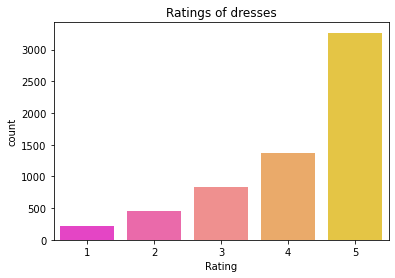

In [4]:
ax = sns.countplot(x="Rating", data=df, palette="spring")
plt.title("Ratings of dresses")
plt.show()

Most reviews give 5 stars. It seems buyers are positive about the dresses or positive people like to leave reviews?

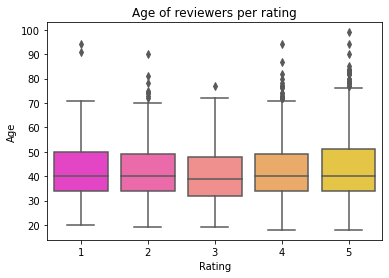

In [5]:
ax = sns.boxplot(x="Rating", y="Age", data=df, palette="spring")
plt.title("Age of reviewers per rating")
plt.show()

The median age amongst the reviewers is rather simular. Although, based on a quick look at the boxplot: reviewers in the category 90-100 seem either really positive or rather negative. It could also be that reviewers just didn't submit accurate personal details. 

In [6]:
# use function to add column assign positive/negative based on rating. This is the value we will predict in the model

p_n = [] 

for value in df["Rating"]: 
    if value >= 4 :
        p_n.append("positive")
    elif value <= 3 :
        p_n.append("negative") 
    else: 
        p_n.append("error") 
       
df["Rating category"] = p_n 

Let's check below how the new categories are distributed.

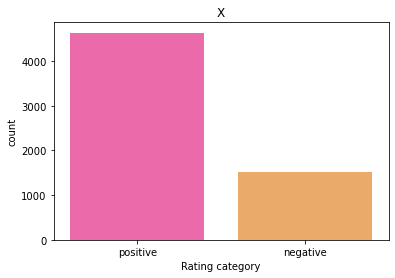

In [7]:
ax = sns.countplot(x="Rating category", data=df, palette="spring")
plt.title("X")
plt.show()

In [8]:
df_sub = df[['Review Text', 'Rating category']]
df_sub.head()

,Review Text,Rating category
1,Love this dress! it's sooo pretty. i happene...,positive
2,I had such high hopes for this dress and reall...,negative
5,"I love tracy reese dresses, but this one is no...",negative
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive


### Transforming the text 

The CountVectorizer breaks up the text, therefore creating a bag of words. The stopwords function will remove all commonly used words such as “the”, “a”, “an”, “in”.

In [9]:
text = df_sub['Review Text'].values.astype('U') #Taking the text from the df. We need to convert it to Unicode
vect = CountVectorizer(stop_words='english') #Create the CV object, with English stop words
vect = vect.fit(text) #We fit the model with the words from the review text
feature_names = vect.get_feature_names() #Get the words from the vocabulary
print(f"There are {len(feature_names)} words in the vocabulary. A selection: {feature_names[500:520]}")

There are 8079 words in the vocabulary. A selection: ['airier', 'airiness', 'airism', 'airline', 'airplane', 'airplanes', 'airport', 'airy', 'aize', 'aka', 'akward', 'al', 'alas', 'albeit', 'alerations', 'alert', 'alexandria', 'align', 'aligned', 'alignment']


In [10]:
docu_feat = vect.transform(text) # make a matrix

In [11]:
print(docu_feat[0:500,0:500])

  (2, 8)	1
  (4, 72)	1
  (4, 224)	1
  (18, 210)	1
  (19, 80)	1
  (19, 435)	1
  (19, 447)	1
  (20, 38)	1
  (21, 4)	1
  (21, 45)	1
  (22, 12)	1
  (22, 248)	1
  (24, 55)	1
  (25, 40)	1
  (27, 60)	1
  (27, 226)	1
  (27, 237)	1
  (28, 436)	1
  (30, 241)	1
  (31, 104)	1
  (31, 186)	1
  (31, 233)	1
  (31, 255)	1
  (32, 428)	1
  (34, 12)	2
  :	:
  (472, 304)	1
  (472, 316)	1
  (474, 104)	1
  (474, 243)	1
  (474, 422)	1
  (475, 84)	1
  (475, 96)	1
  (475, 186)	1
  (475, 233)	1
  (475, 242)	1
  (475, 248)	1
  (477, 86)	1
  (477, 485)	1
  (480, 37)	1
  (482, 66)	1
  (482, 484)	1
  (483, 45)	1
  (483, 184)	1
  (483, 201)	1
  (484, 96)	1
  (488, 108)	1
  (492, 167)	1
  (497, 447)	1
  (498, 60)	1
  (498, 408)	1


### The Naive Bayes Model

Below we will train a Naïve Bayes classifier predicting whether a review is positive (>3 stars) or negative (<4 stars). Then we split the file into a training and a test set.

In [12]:
nb = MultinomialNB() #create the model
X = docu_feat #the document-feature matrix is the X matrix
y = df_sub['Rating category'] #creating the y vector

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data and store it

nb = nb.fit(X_train, y_train) 

### Evaluate the performance of the model

In [13]:
#Evaluate the model
y_test_p = nb.predict(X_test)
nb.score(X_test, y_test)

0.8508676789587852

The Accuracy of our model is 85% which is kind of good. 

In [14]:
df_sub['Rating category'].value_counts(normalize=True)

positive    0.754109
negative    0.245891
Name: Rating category, dtype: float64

In [15]:
nb.classes_

array(['negative', 'positive'], dtype='<U8')

In [16]:
cm = confusion_matrix(y_test, y_test_p)
cm = pd.DataFrame(cm, index=['negative', 'positive'], columns=['negative pred', 'positive pred'])
cm

,negative pred,positive pred
negative,301,168
positive,107,1268


Let's calculate precision and recall. 

Precision attempts to answer the following question: What proportion of positive identifications was actually correct?

Recall attempts to answer the following question: What proportion of actual positives was identified correctly?

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_p))

              precision    recall  f1-score   support

    negative       0.74      0.64      0.69       469
    positive       0.88      0.92      0.90      1375

    accuracy                           0.85      1844
   macro avg       0.81      0.78      0.79      1844
weighted avg       0.85      0.85      0.85      1844



### What is confusing our model?

To analyze why our model has wrongly predicted the rating let's check the assiciated texts. 

In [18]:
df_sub["Prediction"] = nb.predict(X)

<ipython-input-18-416e41c744c4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub["Prediction"] = nb.predict(X)


In [19]:
df_sub.head()

,Review Text,Rating category,Prediction
1,Love this dress! it's sooo pretty. i happene...,positive,positive
2,I had such high hopes for this dress and reall...,negative,negative
5,"I love tracy reese dresses, but this one is no...",negative,negative
8,I love this dress. i usually get an xs but it ...,positive,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive,positive


In [20]:
print(df_sub.iloc[9,0])
print(nb.predict_proba(X[9]))

I love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too.
[[9.42543101e-05 9.99905746e-01]]


In [21]:
print(df_sub.iloc[56,0])
print(nb.predict_proba(X[56]))

Disappointed in the quality of the dress. love the style and especially the colors. the fabric of the body of the dress is very very thin and just poorly made. the top bodice is more substantial. not worth the price tag of $148.00. dress does run short.
[[0.90894051 0.09105949]]


In [22]:
print(df_sub.iloc[279,0])
print(nb.predict_proba(X[279]))

Overall i really like this dress. the color is vibrant & unique. the top of the dress especially the shoulder straps seem loose so i'm getting it tailored.
[[0.19204718 0.80795282]]


After reading these texts it seems that the algorithm is not easily picking up on when reviewers are listing multiple pro's and con's. The pro's contain simular words as positive reviews. 